# Data

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

In [2]:
DATA_PATH = "./datasets/"

In [3]:
crypto_df = pd.read_csv(DATA_PATH + "train.csv")
crypto_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.580000,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.530000,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.194000,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.659600,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.920000,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.302500,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.330000,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.090000,329.8800,329.0900,329.460000,6.635710,329.454118,NaN
8,1514764920,2,53.0,2374.553333,2400.9000,2354.2000,2372.286667,24.050259,2371.434498,-0.004079
9,1514764920,0,7.0,8.530000,8.5300,8.5145,8.514500,71.390000,8.520215,-0.015875


In [4]:
asset_details = pd.read_csv(DATA_PATH + 'asset_details.csv')
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [5]:
crypto_test_df = pd.read_csv(DATA_PATH + 'supplemental_train.csv')
crypto_test_df.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1623542400,3,1201.0,1.478556,1.48603,1.47800,1.483681,654799.561103,1.481439,-0.002594
1,1623542400,2,1020.0,580.306667,583.89000,579.91000,582.276667,1227.988328,581.697038,-0.009143
2,1623542400,0,626.0,343.789500,345.10800,343.64000,344.598000,1718.832569,344.441729,-0.004525
3,1623542400,1,2888.0,35554.289632,35652.46465,35502.67000,35602.004286,163.811537,35583.469303,0.003096
4,1623542400,4,433.0,0.312167,0.31260,0.31192,0.312208,585577.410442,0.312154,0.001426
5,1623542400,5,359.0,4.832550,4.84590,4.82290,4.837583,47143.548386,4.836607,-0.000579
6,1623542400,7,541.0,55.223080,55.49400,55.18200,55.344680,6625.201803,55.298816,-0.003998
7,1623542400,6,2186.0,2371.194286,2379.20000,2369.67000,2374.380714,1214.128692,2374.335307,0.002565
8,1623542400,8,35.0,1.003150,1.01980,0.98730,1.003300,7061.927600,1.002936,-0.005097
9,1623542400,9,560.0,161.933429,162.48000,161.73000,162.214714,1485.009496,162.231310,0.000686


# Bitcoin data plot

In [6]:
import plotly.graph_objects as go

btc = crypto_df[crypto_df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btc_mini = btc.iloc[-200:] # Select recent data rows
fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.show()

# Preprocessing

### add names to crypto df

In [6]:
crypto_df_with_asset_names = pd.merge_ordered(crypto_df, asset_details, fill_method="ffill", left_by="Asset_ID")
crypto_df_with_asset_names.head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
0,1514764860,2,40.0,2376.580000,2399.5,2357.14,2374.590000,19.233005,2373.116392,-0.004218,2.397895,Bitcoin Cash
1,1514764920,2,53.0,2374.553333,2400.9,2354.20,2372.286667,24.050259,2371.434498,-0.004079,2.397895,Bitcoin Cash
2,1514764980,2,61.0,2371.633333,2401.9,2353.70,2372.063333,42.676438,2375.442755,-0.002892,2.397895,Bitcoin Cash
3,1514765040,2,95.0,2376.060000,2406.4,2344.00,2370.566667,37.820918,2371.096152,-0.003718,2.397895,Bitcoin Cash
4,1514765100,2,33.0,2372.656667,2404.6,2343.40,2370.173333,8.519679,2370.345730,-0.002171,2.397895,Bitcoin Cash
5,1514765160,2,44.0,2368.806667,2400.1,2344.00,2367.486667,27.459795,2367.328281,-0.009202,2.397895,Bitcoin Cash
6,1514765220,2,29.0,2367.920000,2399.8,2343.00,2366.860000,57.679405,2366.808135,-0.004458,2.397895,Bitcoin Cash
7,1514765280,2,69.0,2366.680000,2399.5,2343.00,2366.710000,42.115560,2367.779212,-0.006110,2.397895,Bitcoin Cash
8,1514765340,2,30.0,2365.513333,2399.4,2343.80,2366.476667,21.652614,2364.779586,-0.004424,2.397895,Bitcoin Cash
9,1514765400,2,102.0,2367.343333,2399.4,2342.00,2356.300000,36.268655,2362.093324,-0.001696,2.397895,Bitcoin Cash


### group df

In [83]:
crypto_df_groups = [y for x, y in crypto_df_with_asset_names.groupby('Asset_ID', as_index=False)]
crypto_df_groups[1].head(10)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target,Weight,Asset_Name
3896156,1514764860,1,229.0,13835.194,14013.8,13666.11,13850.176,31.550062,13827.062093,-0.014643,6.779922,Bitcoin
3896157,1514764920,1,235.0,13835.036,14052.3,13680.00,13828.102,31.046432,13840.362591,-0.015037,6.779922,Bitcoin
3896158,1514764980,1,528.0,13823.900,14000.4,13601.00,13801.314,55.061820,13806.068014,-0.010309,6.779922,Bitcoin
3896159,1514765040,1,435.0,13802.512,13999.0,13576.28,13768.040,38.780529,13783.598101,-0.008999,6.779922,Bitcoin
3896160,1514765100,1,742.0,13766.000,13955.9,13554.44,13724.914,108.501637,13735.586842,-0.008079,6.779922,Bitcoin
3896161,1514765160,1,554.0,13717.714,14000.7,13520.00,13717.112,70.805776,13706.952030,-0.004422,6.779922,Bitcoin
3896162,1514765220,1,546.0,13720.922,14001.4,13501.01,13670.940,70.762103,13683.843336,-0.008873,6.779922,Bitcoin
3896163,1514765280,1,437.0,13669.246,13914.6,13504.99,13721.348,78.298555,13701.600413,-0.008492,6.779922,Bitcoin
3896164,1514765340,1,288.0,13713.412,13948.9,13539.99,13720.260,60.100796,13720.524584,-0.006282,6.779922,Bitcoin
3896165,1514765400,1,270.0,13713.610,13948.5,13530.00,13719.902,56.578007,13711.904983,-0.003889,6.779922,Bitcoin


### timestamp is key

In [84]:
for i in range(0, len(crypto_df_groups)):
  crypto_df_groups[i] = crypto_df_groups[i].set_index('timestamp')

### Time gaps show problem

In [85]:
(crypto_df_groups[0].index[1:] - crypto_df_groups[0].index[:-1]).value_counts().head(10)

60     1936018
120       5774
180        510
240        117
300         50
360         25
420         18
600         13
480         13
720         10
Name: timestamp, dtype: int64

### reindex

In [86]:
for i in range(0, len(crypto_df_groups)):
  crypto_df_groups[i] = crypto_df_groups[i].reindex(range(crypto_df_groups[i].index[0], crypto_df_groups[i].index[-1]+60, 60), method='pad')

(crypto_df_groups[0].index[1:] - crypto_df_groups[0].index[:-1]).value_counts()

60    1956959
Name: timestamp, dtype: int64

### Missing data show problem

In [87]:
crypto_df_groups[0].isna().sum()

Asset_ID          0
Count             0
Open              0
High              0
Low               0
Close             0
Volume            0
VWAP              0
Target        27712
Weight            0
Asset_Name        0
dtype: int64

### Fill missed target

In [106]:
# for i in range(0, len(crypto_df_groups)):
#   crypto_df_groups[i]['Target'] = crypto_df_groups[i]["Target"].fillna(method = 'pad')

crypto_df_groups[0].isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target        0
Weight        0
Asset_Name    0
dtype: int64

### bitcoin data vizualization

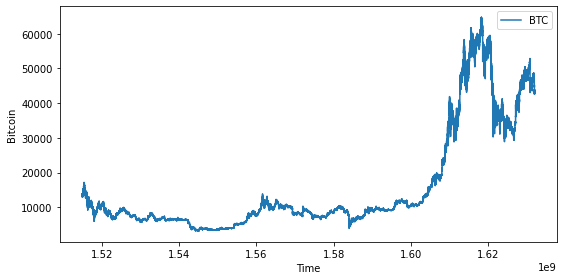

In [109]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(15,4))
ax = f.add_subplot(121)
plt.plot(crypto_df_groups[1]['Close'], label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')
plt.tight_layout()
plt.show()  

# Feauture

### Log returns

In [118]:
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

### 2021 data

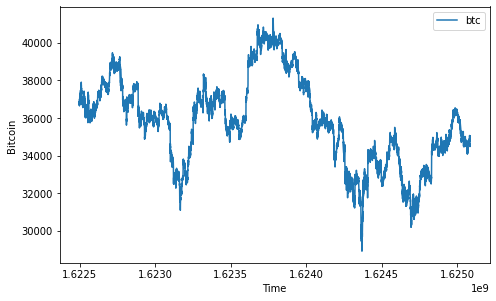

In [116]:
import time

# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

crypto_df_groups2021 = []
for i in range(0, len(crypto_df_groups)):
    crypto_df_groups2021.append(crypto_df_groups[i].loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')])

f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(crypto_df_groups2021[1]['Close'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

plt.tight_layout()
plt.show()

### log income of bitcoin and etherium

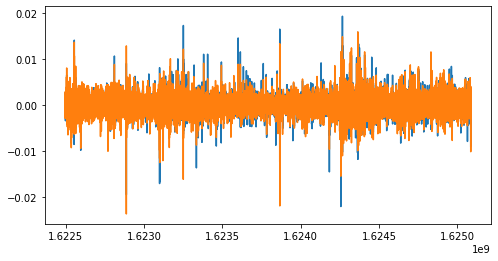

In [121]:
import scipy.stats as stats

lret_btc = log_return(crypto_df_groups2021[1].Close)[1:]
lret_eth = log_return(crypto_df_groups2021[6].Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(lret_btc);
plt.plot(lret_eth);
plt.show()

In [185]:
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

x = []
y = []

for i in range(0, len(crypto_df_groups)):
    x.append(pd.concat([log_return(crypto_df_groups[i].VWAP,periods=5), log_return(crypto_df_groups[i].VWAP,periods=1).abs(), 
               upper_shadow(crypto_df_groups[i]), lower_shadow(crypto_df_groups[i])], axis=1))
    y.append(crypto_df_groups[i].Target)

len(x)

C:\Interpreters\Python\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


14

In [187]:
# select training and test periods
train_window = [totimestamp("01/05/2021"), totimestamp("30/05/2021")]
test_window = [totimestamp("01/06/2021"), totimestamp("30/06/2021")]
x_train = []
y_train = []
x_test = []
y_test =[]

for i in range(0, len(x)):
    x_train.append(x[i].loc[train_window[0]:train_window[1]].fillna(0).to_numpy()) 
    y_train.append(y[i].loc[train_window[0]:train_window[1]].fillna(0).to_numpy())
    x_test.append(x[i].loc[test_window[0]:test_window[1]].fillna(0).to_numpy())
    y_test.append(y[i].loc[test_window[0]:test_window[1]].fillna(0).to_numpy())
    print(len(x_train[i]), len(y_train[i]))
    print(len(x_test[i]), len(y_test[i]))


41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761


In [189]:
from sklearn.preprocessing import StandardScaler
# simple preprocessing of the data 
scaler = StandardScaler()

x_train_scaled = []
x_test_scaled = []

for i in range(0, len(x_train)):
    x_train_scaled.append(scaler.fit_transform(x_train[i]))
    x_test_scaled.append(scaler.transform(x_test[i]))
    print(len(x_train_scaled[i]), len(x_test_scaled[i]))

41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761
41761 41761


### LinearRegression

In [191]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train_scaled[1],y_train[1])
y_pred_lr_btc = lr.predict(x_test_scaled[1])

lr.fit(x_train_scaled[6],y_train[6])
y_pred_lr_eth = lr.predict(x_test_scaled[6])

In [192]:
from sklearn.multioutput import MultiOutputRegressor

# we concatenate X and y for both assets
X_both_train = np.concatenate((x_train_scaled[1], x_train_scaled[6]), axis=1)
X_both_test = np.concatenate((x_test_scaled[1], x_test_scaled[6]), axis=1)
y_both_train = np.column_stack((y_train[1], y_train[6]))
y_both_test = np.column_stack((y_test[1], y_test[6]))

# define the direct multioutput model and fit it
mlr = MultiOutputRegressor(LinearRegression())
mlr.fit(X_both_train,y_both_train)
y_pred_lr_both = mlr.predict(X_both_test)

In [194]:
print('Test score for LR baseline: BTC', f"{np.corrcoef(y_pred_lr_btc, y_test[1])[0,1]:.2f}", 
                                ', ETH', f"{np.corrcoef(y_pred_lr_eth, y_test[6])[0,1]:.2f}")
print('Test score for multiple output LR baseline: BTC', f"{np.corrcoef(y_pred_lr_both[:,0], y_test[1])[0,1]:.2f}", 
                                                ', ETH', f"{np.corrcoef(y_pred_lr_both[:,1], y_test[6])[0,1]:.2f}")

Test score for LR baseline: BTC -0.01 , ETH 0.02
Test score for multiple output LR baseline: BTC 0.01 , ETH 0.05


### Sequential

In [301]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Conv1D, MaxPooling1D, TimeDistributed, Flatten
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam

model = Sequential()
# model.add(LSTM(25, return_sequences=True))
model.add(LSTM(50, return_sequences=True, input_shape=(4, 1)))
# model.add(LSTM(25, return_sequences=True))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(25))
model.add(Dense(1))

# model.compile(loss='mse', optimizer=Adam(learning_rate=1e-1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_71 (LSTM)              (None, 4, 50)             10400     
                                                                 
 lstm_72 (LSTM)              (None, 4, 50)             20200     
                                                                 
 lstm_73 (LSTM)              (None, 50)                20200     
                                                                 
 dense_41 (Dense)            (None, 25)                1275      
                                                                 
 dense_42 (Dense)            (None, 1)                 26        
                                                                 
Total params: 52,101
Trainable params: 52,101
Non-trainable params: 0
_________________________________________________________________


In [302]:
history = model.fit(x_train_scaled[6], y_train[6], batch_size=256, epochs=20)

Epoch 1/20
164/164 [==============================] - 8s 15ms/step - loss: 2.2872e-05
Epoch 2/20
164/164 [==============================] - 2s 15ms/step - loss: 1.9517e-05
Epoch 3/20
164/164 [==============================] - 2s 14ms/step - loss: 2.0096e-05
Epoch 4/20
164/164 [==============================] - 2s 15ms/step - loss: 1.9768e-05
Epoch 5/20
164/164 [==============================] - 2s 15ms/step - loss: 1.9765e-05
Epoch 6/20
164/164 [==============================] - 2s 15ms/step - loss: 1.9881e-05
Epoch 7/20
164/164 [==============================] - 3s 16ms/step - loss: 1.9478e-05
Epoch 8/20
164/164 [==============================] - 3s 15ms/step - loss: 1.9466e-05
Epoch 9/20
164/164 [==============================] - 3s 15ms/step - loss: 1.9541e-05
Epoch 10/20
164/164 [==============================] - 3s 16ms/step - loss: 1.9352e-05
Epoch 11/20
164/164 [==============================] - 3s 16ms/step - loss: 1.9469e-05
Epoch 12/20
164/164 [==============================]

<AxesSubplot:ylabel='loss'>

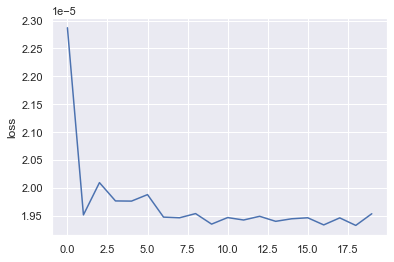

In [303]:
import seaborn as sns

sns.set()
df_history = pd.DataFrame(history.history)
sns.lineplot(x = df_history.index, y = df_history.loss)

In [304]:
labels_pred = model.predict(x_test_scaled[1])
print(y_test[1][1])
print(len(labels_pred.flatten()), len(y_test[1].flatten()))

0.0011697426118656
41761 41761


In [305]:
np.corrcoef(labels_pred.flatten(), y_test[1].flatten())[0, 1]

0.014400175010438152